In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("Jisdoredit1.csv", parse_dates = True, index_col = 0)

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

train = df['Rate'][:505].to_numpy()
test = df['Rate'][505:].to_numpy()
sc = MinMaxScaler(feature_range=(0,1))
train = sc.fit_transform(train.reshape(-1,1))
test = sc.transform(test.reshape(-1,1))

def data_preparation(data):
    x = []
    y = []
    
    for i in range(5, len(data)):
        x.append(data[i-5:i, 0])
        y.append(data[i])
    x, y = np.array(x), np.array(y)
    
    x = np.reshape(x, (x.shape[0], x.shape[1], 1))
    return x, y

x_train, y_train = data_preparation(train)
x_test, y_test = data_preparation(test)

model = Sequential()
model.add(LSTM(units=5, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=5))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer = 'adam', loss ='mean_squared_error', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 50, batch_size = 16)

Epoch 1/50
32/32 [==============================] - 8s 17ms/step - loss: 0.0728 - accuracy: 0.0020
Epoch 2/50
32/32 [==============================] - 1s 18ms/step - loss: 0.0382 - accuracy: 0.0020
Epoch 3/50
32/32 [==============================] - 1s 19ms/step - loss: 0.0241 - accuracy: 0.0020
Epoch 4/50
32/32 [==============================] - 0s 14ms/step - loss: 0.0233 - accuracy: 0.0020
Epoch 5/50
32/32 [==============================] - 0s 14ms/step - loss: 0.0184 - accuracy: 0.0020
Epoch 6/50
32/32 [==============================] - 0s 13ms/step - loss: 0.0170 - accuracy: 0.0020
Epoch 7/50
32/32 [==============================] - 0s 13ms/step - loss: 0.0119 - accuracy: 0.0020
Epoch 8/50
32/32 [==============================] - 0s 13ms/step - loss: 0.0098 - accuracy: 0.0020
Epoch 9/50
32/32 [==============================] - 0s 12ms/step - loss: 0.0073 - accuracy: 0.0040
Epoch 10/50
32/32 [==============================] - 0s 13ms/step - loss: 0.0081 - accuracy: 0.0040
Epoch 11/

2/2 [==============================] - 2s 18ms/step


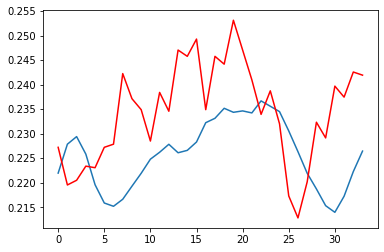

In [3]:
y_pred = model.predict(x_test)
fig, ax = plt.subplots()
ax.plot(y_pred)
ax.plot(y_test, c = 'r')

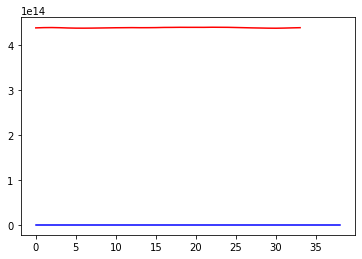

In [7]:
y_pred = sc.inverse_transform(y_pred)
fig, ax = plt.subplots()
y_real = df['Rate'].to_numpy()
ax.plot(y_real[505:], color ='b', label = 'Real Rate')
ax.plot(y_pred, color ='r', label = 'Forcaste Rate')